# TUMOR DETECTION USING SVM AND LOGICAL REGRESSION


In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Preparing And Collecting DATA

In [2]:
#Path to our files,and defining our classes in dictionary
import os

path = os.listdir('C:/Users/User/Desktop/Raunak Ali/gui/Tumoe detection/SVM VERSION_1/brain_tumor')
classes = {'no_tumor':0, 'pituitary_tumor':1}

## MARKING OUR X=IMAGE FEATURES,Y=0,1,ie it is either a no-tumor or tumor

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/User/Desktop/Raunak Ali/gui/Tumoe detection/SVM VERSION_1/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))#This is pixel intensity-based feature extraction->around 40000 features per picture are being extracted
        X.append(img)
        Y.append(classes[cls])

In [4]:
X[7]

array([[19, 14,  9, ..., 12, 11, 11],
       [14,  9,  4, ...,  7,  6,  5],
       [10,  4,  0, ...,  1,  0,  0],
       ...,
       [ 7,  4,  2, ...,  4,  3,  2],
       [10,  8,  6, ...,  8,  7,  6],
       [ 8,  7,  3, ...,  5,  4,  3]], dtype=uint8)

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)
print(X.shape)
print(X_updated.shape)

(1222, 200, 200)
(1222, 40000)


In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

## Visualize The data

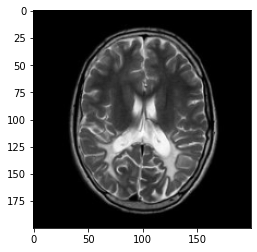

In [8]:
plt.imshow(X[50],cmap='gray')

## Split the data  

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [10]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

## Feature Scaling

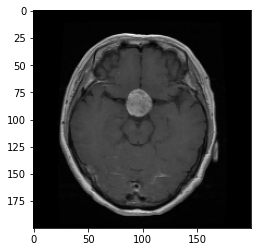

In [11]:
X_updated = xtrain[10].reshape(200,200)
plt.imshow(X_updated,cmap='gray')

In [12]:
#Since the intensity fo the pixels can only range from 0-255,we have divided the intensities by 255,such that the range in which x falls on is smaller now,and thus the data is easier to deal with
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
#If not scale, the feature with a higher value range starts dominating when calculating distances, as explained intuitively in the “why?” section.

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
xtrain
xtrain.shape

(977, 40000)

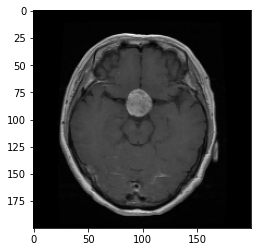

In [14]:
X_updated = xtrain[10].reshape(200,200)
plt.imshow(X_updated,cmap='gray')

## Our Scatter plot So far

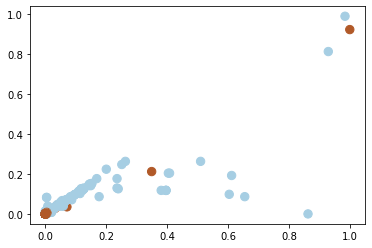

In [15]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,s=70,cmap=plt.cm.Paired)
plt.show()

## Feature Selection:PCA

In [16]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)#reduces dimension to most informative 98% of our features.
pca_train = pca.fit_transform(xtrain)#Train data is analysed and pc will be formed.
pca_test = pca.transform(xtest)#Test data features will be reduced based on pc made above.
#xtrain=pca_train 
#xtest=pca_test

(977, 40000) (245, 40000)


In [17]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components_)
print(pca.n_features_)

(977, 621) (245, 621)
621
40000


## Our Scatter plot after PCA

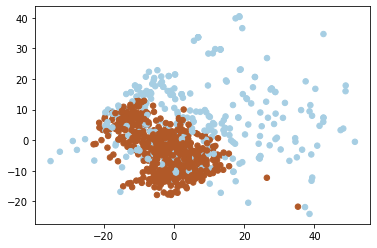

In [18]:
plt.scatter(pca_train[:,0],pca_train[:,1],c=ytrain,s=30,cmap=plt.cm.Paired)
plt.show()

## Train Our Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
import warnings
warnings.filterwarnings('ignore')


In [21]:
sv = SVC(kernel='linear',C=1.0)
sv.fit(xtrain, ytrain)

SVC(kernel='linear')

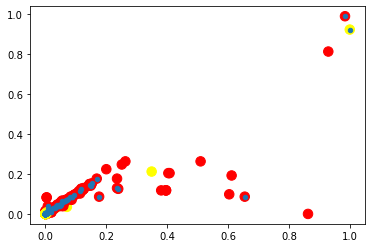

In [22]:
#PLOTTING FOR OUR SAKE OF VISUALIZATION
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, s=90, cmap='autumn')
plt.scatter(sv.support_vectors_[:,0],sv.support_vectors_[:,1],s=20)


In [23]:
#KNN
KNN_MODEL = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [24]:
KNN_MODEL.fit(xtrain,ytrain)

KNeighborsClassifier()

## Evaluation

In [25]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))


Training Score: 1.0
Testing Score: 0.9591836734693877


In [26]:
#10-fold cross-validation
kfold= model_selection.KFold(n_splits=10)
result= model_selection.cross_val_score(sv, xtrain, ytrain, cv=kfold)
print('Accuracy',result.mean())

Accuracy 0.9509046917736166


In [27]:
#10-fold cross-validation
kfold= model_selection.KFold(n_splits=10)
result1= model_selection.cross_val_score(KNN_MODEL, xtrain, ytrain, cv=kfold)
print('Accuracy',result1.mean())

Accuracy 0.9212076583210604


[true positive,false positive]
[false negative,true negative]

## Predictions

In [28]:
from sklearn.metrics import plot_confusion_matrix
pred = sv.predict(xtest)
sv_cm=confusion_matrix(ytest,pred)
print('SVM confusion matrix',sv_cm)


SVM confusion matrix [[ 73   8]
 [  2 162]]


In [29]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 29,  32,  36,  49, 120, 126, 169, 214, 225, 239], dtype=int64),)

In [30]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  10
0 1


In [31]:
pred_KNN=KNN_MODEL.predict(xtest)
cm_KNN = confusion_matrix(ytest,pred_KNN)
print('KNN confusion matrix',cm_KNN)

KNN confusion matrix [[ 69  12]
 [  2 162]]


In [32]:
missclassified=np.where(ytest!=pred_KNN)
missclassified

(array([  3,  19,  33,  49,  51,  65,  68,  76, 128, 153, 199, 214, 225,
        239], dtype=int64),)

In [33]:
print("Total Misclassified Samples: ",len(missclassified[0]))
print(pred_KNN[36],ytest[36])

Total Misclassified Samples:  14
1 1


## HYBRID MODEL

In [34]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [35]:
model21 = SVC(kernel = 'linear')
estimators.append(('svm1', model21))
model22 = SVC(kernel = 'poly')
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
model25 = SVC(kernel = 'linear')
estimators.append(('svm5', model25))

In [36]:
model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn2', model27))
model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
estimators.append(('knn3', model28))
model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn5', model30))

In [37]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(xtrain, ytrain)
y_pred = ensemble.predict(xtest)

# Joblib Loading

In [38]:
import joblib
filename='hybrid_model.sav'
joblib.dump(ensemble,filename)

['hybrid_model.sav']

## accuracy

In [39]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(ytest, y_pred)
print(cm_HybridEnsembler)

[[ 74   7]
 [  3 161]]


In [40]:
print("Training Score:", ensemble.score(xtrain, ytrain))
print("Testing Score:", ensemble.score(xtest, ytest))


Training Score: 0.9969293756397134
Testing Score: 0.9591836734693877


In [41]:
#10-fold cross-validation
kfold= model_selection.KFold(n_splits=10)
result2= model_selection.cross_val_score(ensemble, xtrain, ytrain, cv=kfold)
print('Accuracy',result2.mean())

Accuracy 0.9590679570797391


In [42]:
missclassifiedd=np.where(ytest!=y_pred)
missclassifiedd

(array([ 36,  49,  51,  68, 120, 128, 199, 214, 225, 239], dtype=int64),)

In [43]:
print("Total Misclassified Samples: ",len(missclassifiedd[0]))
print(y_pred[36],ytest[36])

Total Misclassified Samples:  10
0 1


# FORMULA MATRIX CONFUSION SE NIKAL LIYO


In [45]:
#MEAN SQUARE EROR 
#PRECISION=0.96
#RECALL=0.91
#F1 MEASURE
#5000 DATALEARNING
#lIBRARAY SPECIFIC MODEL FORMULA

## Testing Model 

In [46]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)
(200, 200)
(1, 40000)


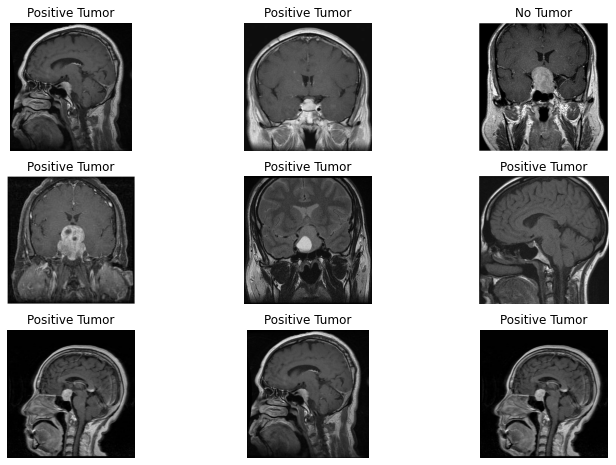

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    print(img1.shape)
    img1 = img1.reshape(1,-1)/255
    print(img1.shape)
    plt.imshow(img1, cmap='gray')
    p =  ensemble.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
# FR CV2 nd Django integraon-> https://www.youtube.com/watch?v=9FNYmS4N30M
# FR Django +L integration ->https://www.youtube.com/watch?v=zcALUNZNBUk